In [1]:
import pandas as pd

df = pd.read_excel('./test_test.xlsx')
df.head()

,탑승 일시,탑승 시간,교통수단,사용처,사용금액,사용후잔액,승차역,하차역,하차일시,하차 시간,노선(호선),차량번호
0,2023-06-02,07:50:26,버스,(주)서울승합,300원,"14,450원",신논현역.구교보타워사거리,영동시장,2023-06-02,07:56:10,3412번(강동공영차고지~강남역),서울74사5439
1,2023-06-02,06:43:19,버스,경남여객(노선입찰제),"2,800원","14,750원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,2023-06-02,07:40:21,경기버스노선,NaN
2,2023-06-01,08:04:14,버스,경기상운(노선입찰제),400원,"20,650원",지하철2호선.강남역(중),학동역6번출구,2023-06-01,08:17:42,경기버스노선,NaN
3,2023-06-01,06:51:20,버스,경남여객(노선입찰제),"2,800원","21,050원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,2023-06-01,07:59:02,경기버스노선,NaN
4,2023-05-31,07:56:26,버스,(주)서울승합,400원,"27,550원",신논현역.구교보타워사거리,학동역5번출구,2023-05-31,08:03:11,3412번(강동공영차고지~강남역),서울74사4220


# 1. ‘교통수단’, ‘사용처’, ‘사용후잔액’,   ‘하차 일시’,‘차량번호’열 없애기

In [2]:
columns_to_exclude = ['교통수단', '사용처', '사용후잔액', '하차일시', '차량번호']
df = df.drop(columns=columns_to_exclude, axis=1)
df.head()

,탑승 일시,탑승 시간,사용금액,승차역,하차역,하차 시간,노선(호선)
0,2023-06-02,07:50:26,300원,신논현역.구교보타워사거리,영동시장,07:56:10,3412번(강동공영차고지~강남역)
1,2023-06-02,06:43:19,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,07:40:21,경기버스노선
2,2023-06-01,08:04:14,400원,지하철2호선.강남역(중),학동역6번출구,08:17:42,경기버스노선
3,2023-06-01,06:51:20,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,07:59:02,경기버스노선
4,2023-05-31,07:56:26,400원,신논현역.구교보타워사거리,학동역5번출구,08:03:11,3412번(강동공영차고지~강남역)


# 2. 요일 열 추가하기

In [3]:
# 탑승 일시 열을 datetime 형식으로 변환
df['탑승 일시'] = pd.to_datetime(df['탑승 일시'])

# '요일' 열 추가 (한국어로 표시)
df['요일'] = df['탑승 일시'].dt.strftime('%A')

# 한국어 요일명으로 변경
weekday_dict = {
    'Monday': '월',
    'Tuesday': '화',
    'Wednesday': '수',
    'Thursday': '목',
    'Friday': '금',
    'Saturday': '토',
    'Sunday': '일'
}

df['요일'] = df['요일'].map(weekday_dict)

df.head()

,탑승 일시,탑승 시간,사용금액,승차역,하차역,하차 시간,노선(호선),요일
0,2023-06-02,07:50:26,300원,신논현역.구교보타워사거리,영동시장,07:56:10,3412번(강동공영차고지~강남역),금
1,2023-06-02,06:43:19,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,07:40:21,경기버스노선,금
2,2023-06-01,08:04:14,400원,지하철2호선.강남역(중),학동역6번출구,08:17:42,경기버스노선,목
3,2023-06-01,06:51:20,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,07:59:02,경기버스노선,목
4,2023-05-31,07:56:26,400원,신논현역.구교보타워사거리,학동역5번출구,08:03:11,3412번(강동공영차고지~강남역),수


# 3. 하차 시간 - 탑승 시간 = 이동 시간 열 추가

In [4]:
from datetime import datetime

df['탑승 시간'] = pd.to_datetime(df['탑승 시간'])
df['하차 시간'] = pd.to_datetime(df['하차 시간'])


df['이동 시간'] = df['하차 시간'] - df['탑승 시간']
df.head()

C:\Users\korea\AppData\Local\Temp\ipykernel_16764\416356168.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['탑승 시간'] = pd.to_datetime(df['탑승 시간'])
C:\Users\korea\AppData\Local\Temp\ipykernel_16764\416356168.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['하차 시간'] = pd.to_datetime(df['하차 시간'])


,탑승 일시,탑승 시간,사용금액,승차역,하차역,하차 시간,노선(호선),요일,이동 시간
0,2023-06-02,2023-06-07 07:50:26,300원,신논현역.구교보타워사거리,영동시장,2023-06-07 07:56:10,3412번(강동공영차고지~강남역),금,0 days 00:05:44
1,2023-06-02,2023-06-07 06:43:19,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,2023-06-07 07:40:21,경기버스노선,금,0 days 00:57:02
2,2023-06-01,2023-06-07 08:04:14,400원,지하철2호선.강남역(중),학동역6번출구,2023-06-07 08:17:42,경기버스노선,목,0 days 00:13:28
3,2023-06-01,2023-06-07 06:51:20,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,2023-06-07 07:59:02,경기버스노선,목,0 days 01:07:42
4,2023-05-31,2023-06-07 07:56:26,400원,신논현역.구교보타워사거리,학동역5번출구,2023-06-07 08:03:11,3412번(강동공영차고지~강남역),수,0 days 00:06:45


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   탑승 일시   60 non-null     datetime64[ns] 
 1   탑승 시간   60 non-null     datetime64[ns] 
 2   사용금액    60 non-null     object         
 3   승차역     60 non-null     object         
 4   하차역     60 non-null     object         
 5   하차 시간   60 non-null     datetime64[ns] 
 6   노선(호선)  60 non-null     object         
 7   요일      60 non-null     object         
 8   이동 시간   60 non-null     timedelta64[ns]
dtypes: datetime64[ns](3), object(5), timedelta64[ns](1)
memory usage: 4.3+ KB


In [6]:
df['이동 시간'] = df['이동 시간'].apply(lambda x: str(x).split(' ')[-1])
df.head()

,탑승 일시,탑승 시간,사용금액,승차역,하차역,하차 시간,노선(호선),요일,이동 시간
0,2023-06-02,2023-06-07 07:50:26,300원,신논현역.구교보타워사거리,영동시장,2023-06-07 07:56:10,3412번(강동공영차고지~강남역),금,00:05:44
1,2023-06-02,2023-06-07 06:43:19,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,2023-06-07 07:40:21,경기버스노선,금,00:57:02
2,2023-06-01,2023-06-07 08:04:14,400원,지하철2호선.강남역(중),학동역6번출구,2023-06-07 08:17:42,경기버스노선,목,00:13:28
3,2023-06-01,2023-06-07 06:51:20,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,2023-06-07 07:59:02,경기버스노선,목,01:07:42
4,2023-05-31,2023-06-07 07:56:26,400원,신논현역.구교보타워사거리,학동역5번출구,2023-06-07 08:03:11,3412번(강동공영차고지~강남역),수,00:06:45


탑승 일시   요일    탑승 시간   하차 시간   이동 시간   노선(호선)  승차역  하차역  사용금액  
순으로 정렬

In [7]:
new_order = ['탑승 일시', '요일', '탑승 시간', '하차 시간', '이동 시간', '노선(호선)', '승차역', '하차역', '사용금액']
df = df.reindex(columns=new_order)

df.head()

,탑승 일시,요일,탑승 시간,하차 시간,이동 시간,노선(호선),승차역,하차역,사용금액
0,2023-06-02,금,2023-06-07 07:50:26,2023-06-07 07:56:10,00:05:44,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,영동시장,300원
1,2023-06-02,금,2023-06-07 06:43:19,2023-06-07 07:40:21,00:57:02,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,"2,800원"
2,2023-06-01,목,2023-06-07 08:04:14,2023-06-07 08:17:42,00:13:28,경기버스노선,지하철2호선.강남역(중),학동역6번출구,400원
3,2023-06-01,목,2023-06-07 06:51:20,2023-06-07 07:59:02,01:07:42,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,"2,800원"
4,2023-05-31,수,2023-06-07 07:56:26,2023-06-07 08:03:11,00:06:45,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,학동역5번출구,400원


# 4. 1차 교통, 2차 교통 구분

In [8]:
# '사용금액' 열의 숫자 부분 추출 및 정수형 변환
df['사용금액'] = df['사용금액'].str.replace(',', '').str.extract('(\d+)').astype(int)

# '1차 교통'과 '2차 교통'으로 분류
df['교통수단'] = df['사용금액'].apply(lambda x: '1차 교통' if x >= 2000 else '2차 교통')

df.head()

,탑승 일시,요일,탑승 시간,하차 시간,이동 시간,노선(호선),승차역,하차역,사용금액,교통수단
0,2023-06-02,금,2023-06-07 07:50:26,2023-06-07 07:56:10,00:05:44,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,영동시장,300,2차 교통
1,2023-06-02,금,2023-06-07 06:43:19,2023-06-07 07:40:21,00:57:02,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,2800,1차 교통
2,2023-06-01,목,2023-06-07 08:04:14,2023-06-07 08:17:42,00:13:28,경기버스노선,지하철2호선.강남역(중),학동역6번출구,400,2차 교통
3,2023-06-01,목,2023-06-07 06:51:20,2023-06-07 07:59:02,01:07:42,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,2800,1차 교통
4,2023-05-31,수,2023-06-07 07:56:26,2023-06-07 08:03:11,00:06:45,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,학동역5번출구,400,2차 교통


# 5. 2차 교통에서 9202번 버스와 3412 구분해서 비교

In [9]:
# '버스번호' 값 변경
df.loc[(df['교통수단'] == '2차 교통') & (df['노선(호선)'].str.contains('3412', na=False)), '버스번호'] = 3412
df.loc[(df['교통수단'] == '2차 교통') & (~df['노선(호선)'].str.contains('3412', na=False)), '버스번호'] = 9202
df['버스번호'].fillna('0', inplace=True)  # 빈 값인 경우 0으로 채우기

# '버스번호' 열의 값이 3412.0인 경우를 3412로 변경합니다
df['버스번호'] = df['버스번호'].astype(float)

df.head()

,탑승 일시,요일,탑승 시간,하차 시간,이동 시간,노선(호선),승차역,하차역,사용금액,교통수단,버스번호
0,2023-06-02,금,2023-06-07 07:50:26,2023-06-07 07:56:10,00:05:44,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,영동시장,300,2차 교통,3412.0
1,2023-06-02,금,2023-06-07 06:43:19,2023-06-07 07:40:21,00:57:02,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,2800,1차 교통,0.0
2,2023-06-01,목,2023-06-07 08:04:14,2023-06-07 08:17:42,00:13:28,경기버스노선,지하철2호선.강남역(중),학동역6번출구,400,2차 교통,9202.0
3,2023-06-01,목,2023-06-07 06:51:20,2023-06-07 07:59:02,01:07:42,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,2800,1차 교통,0.0
4,2023-05-31,수,2023-06-07 07:56:26,2023-06-07 08:03:11,00:06:45,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,학동역5번출구,400,2차 교통,3412.0


# 6. 1차 교통에서 5001번 버스와 5001-1 버스 구분하기

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   탑승 일시   60 non-null     datetime64[ns]
 1   요일      60 non-null     object        
 2   탑승 시간   60 non-null     datetime64[ns]
 3   하차 시간   60 non-null     datetime64[ns]
 4   이동 시간   60 non-null     object        
 5   노선(호선)  60 non-null     object        
 6   승차역     60 non-null     object        
 7   하차역     60 non-null     object        
 8   사용금액    60 non-null     int32         
 9   교통수단    60 non-null     object        
 10  버스번호    60 non-null     float64       
dtypes: datetime64[ns](3), float64(1), int32(1), object(6)
memory usage: 5.0+ KB


In [11]:
from sklearn.cluster import KMeans

# '이동시간' 열을 시간(분)으로 변환
df['이동시간(분)'] = df['이동 시간'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

# '버스번호' 값 변경 및 비지도 학습을 위한 클러스터링
df.loc[df['교통수단'] == '1차 교통', '버스번호'] = 5001
X = df[df['교통수단'] == '1차 교통'][['이동시간(분)']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_
df.loc[df['교통수단'] == '1차 교통', '버스번호'] = [5001 if label == 0 else 5001.1 for label in labels]

df = df.drop('이동시간(분)', axis=1)

df.head()

C:\Users\korea\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,탑승 일시,요일,탑승 시간,하차 시간,이동 시간,노선(호선),승차역,하차역,사용금액,교통수단,버스번호
0,2023-06-02,금,2023-06-07 07:50:26,2023-06-07 07:56:10,00:05:44,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,영동시장,300,2차 교통,3412.0
1,2023-06-02,금,2023-06-07 06:43:19,2023-06-07 07:40:21,00:57:02,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,2800,1차 교통,5001.0
2,2023-06-01,목,2023-06-07 08:04:14,2023-06-07 08:17:42,00:13:28,경기버스노선,지하철2호선.강남역(중),학동역6번출구,400,2차 교통,9202.0
3,2023-06-01,목,2023-06-07 06:51:20,2023-06-07 07:59:02,01:07:42,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,2800,1차 교통,5001.1
4,2023-05-31,수,2023-06-07 07:56:26,2023-06-07 08:03:11,00:06:45,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,학동역5번출구,400,2차 교통,3412.0


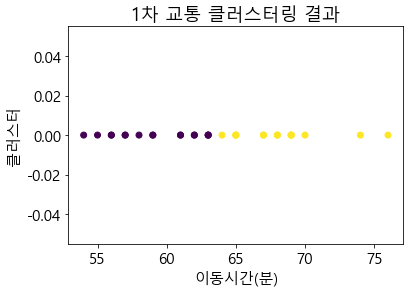

In [12]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15 # 글자크기

# 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결
matplotlib.rcParams['axes.unicode_minus']=False

# 시각화
plt.scatter(X, [0] * len(X), c=labels)
plt.xlabel('이동시간(분)')
plt.ylabel('클러스터')
plt.title('1차 교통 클러스터링 결과')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   탑승 일시   60 non-null     datetime64[ns]
 1   요일      60 non-null     object        
 2   탑승 시간   60 non-null     datetime64[ns]
 3   하차 시간   60 non-null     datetime64[ns]
 4   이동 시간   60 non-null     object        
 5   노선(호선)  60 non-null     object        
 6   승차역     60 non-null     object        
 7   하차역     60 non-null     object        
 8   사용금액    60 non-null     int32         
 9   교통수단    60 non-null     object        
 10  버스번호    60 non-null     float64       
dtypes: datetime64[ns](3), float64(1), int32(1), object(6)
memory usage: 5.0+ KB


# 9. 그래프로 요일별 이동 시간 그리기

In [14]:
# '탑승 일시'를 날짜 형식으로 변환
df['탑승 일시'] = pd.to_datetime(df['탑승 일시']).dt.date

# '탑승 일시'를 기준으로 데이터프레임 그룹화
grouped_df = df.groupby('탑승 일시')

# '요일'은 '탑승 일시'를 기준으로 그룹화
weekday_df = grouped_df['요일'].first().reset_index()

# '탑승시간'은 '교통수단'열에서 값이 '1차교통'인 경우 그룹화
boarding_time_df = grouped_df.apply(lambda x: x[x['교통수단'] == '1차 교통']['탑승 시간'].mean()).reset_index()
boarding_time_df.columns = ['탑승 일시', '탑승 시간']

# '하차 시간'은 '교통수단'열에서 값이 '2차 교통'인 경우 그룹화
alighting_time_df = grouped_df.apply(lambda x: x[x['교통수단'] == '2차 교통']['하차 시간'].mean()).reset_index()
alighting_time_df.columns = ['탑승 일시', '하차 시간']

# '사용금액'은 '탑승 일시'를 기준으로 합계 계산
usage_amount_df = grouped_df['사용금액'].sum().reset_index()

# 데이터베이스 생성을 위해 모든 데이터프레임을 병합
new_df = weekday_df.merge(boarding_time_df, on='탑승 일시').merge(alighting_time_df, on='탑승 일시').merge(usage_amount_df, on='탑승 일시')

new_df

,탑승 일시,요일,탑승 시간,하차 시간,사용금액
0,2023-04-19,수,2023-06-07 06:54:56,2023-06-07 08:20:23,3100
1,2023-04-20,목,2023-06-07 06:45:55,2023-06-07 08:15:44,3100
2,2023-04-21,금,2023-06-07 06:42:53,2023-06-07 08:07:16,3100
3,2023-04-24,월,2023-06-07 06:49:41,2023-06-07 08:17:40,3100
4,2023-04-25,화,2023-06-07 06:43:00,2023-06-07 08:12:31,3100
5,2023-04-26,수,2023-06-07 06:39:05,2023-06-07 08:02:05,3200
6,2023-04-27,목,2023-06-07 06:54:06,2023-06-07 08:22:56,3200
7,2023-04-28,금,2023-06-07 06:42:44,2023-06-07 08:04:29,3100
8,2023-05-02,화,2023-06-07 06:42:16,2023-06-07 08:17:39,3200
9,2023-05-03,수,2023-06-07 06:39:06,2023-06-07 08:16:05,3200


In [15]:
# '이동 시간' 계산
new_df['이동 시간'] = new_df['하차 시간'] - new_df['탑승 시간']

# '이동 시간'의 Dtype을 timedelta로 설정
new_df['이동 시간'] = new_df['이동 시간'].astype('timedelta64[s]')
new_df.head()

,탑승 일시,요일,탑승 시간,하차 시간,사용금액,이동 시간
0,2023-04-19,수,2023-06-07 06:54:56,2023-06-07 08:20:23,3100,0 days 01:25:27
1,2023-04-20,목,2023-06-07 06:45:55,2023-06-07 08:15:44,3100,0 days 01:29:49
2,2023-04-21,금,2023-06-07 06:42:53,2023-06-07 08:07:16,3100,0 days 01:24:23
3,2023-04-24,월,2023-06-07 06:49:41,2023-06-07 08:17:40,3100,0 days 01:27:59
4,2023-04-25,화,2023-06-07 06:43:00,2023-06-07 08:12:31,3100,0 days 01:29:31


In [16]:
new_df['탑승 시간'] = new_df['탑승 시간'].dt.strftime('%H:%M:%S')
new_df['하차 시간'] = new_df['하차 시간'].dt.strftime('%H:%M:%S')

new_df.head()

,탑승 일시,요일,탑승 시간,하차 시간,사용금액,이동 시간
0,2023-04-19,수,06:54:56,08:20:23,3100,0 days 01:25:27
1,2023-04-20,목,06:45:55,08:15:44,3100,0 days 01:29:49
2,2023-04-21,금,06:42:53,08:07:16,3100,0 days 01:24:23
3,2023-04-24,월,06:49:41,08:17:40,3100,0 days 01:27:59
4,2023-04-25,화,06:43:00,08:12:31,3100,0 days 01:29:31


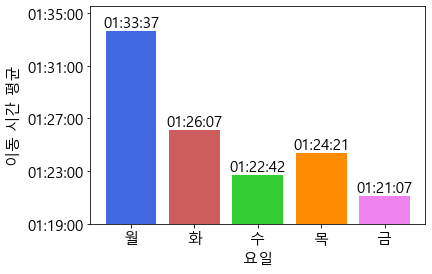

In [17]:
import numpy as np

# 요일별 이동 시간 평균 계산
mean_by_day = new_df.groupby('요일')['이동 시간'].mean()

# 요일 순서 리스트 생성
days = ['월', '화', '수', '목', '금']
mean_by_day = mean_by_day.reindex(days)

# 색상 리스트
colors = ['royalblue', 'indianred', 'limegreen', 'darkorange', 'violet', 'lightgray']

# 시각화
plt.bar(mean_by_day.index, mean_by_day, color=colors)
plt.xlabel('요일')
plt.ylabel('이동 시간 평균')

ylim_int = []

# 막대 위에 값 텍스트 추가
for i, v in enumerate(mean_by_day.values):
    v_str = str(v)[:4]
    y = int(v_str)
    ylim_int.append(y)
    hours = y // 3600
    minutes = (y % 3600) // 60
    seconds = y % 60
    time_formatted = f"{hours:02d}:{minutes:02d}:{seconds:02d}"
    plt.text(i, y, time_formatted, ha='center', va='bottom')

# ylim 시분초로 수정
delta = 60 * 2
ylim_min = int(min(ylim_int) / 10) * 10 - delta
ylim_max = int(max(ylim_int) / 10) * 10 + delta
plt.ylim(ylim_min, ylim_max)
time_int = range(ylim_min, ylim_max, 240)
ylim_data = []
for i in time_int:
    hours = i // 3600
    minutes = (i % 3600) // 60
    seconds = i % 60
    time_formatted = f"{hours:02d}:{minutes:02d}:{seconds:02d}"
    ylim_data.append(time_formatted)
plt.yticks(time_int, ylim_data)

# 그래프 보이기
plt.show()

# 8. 머신러닝

## 1) df의 2차 교통 비교

In [18]:
filtered_df = df[df['교통수단'] == '2차 교통']

# 필요한 열만 선택하여 가져옵니다.
desired_columns = ['요일', '탑승 시간', '하차 시간', '버스번호', '이동 시간']
df_2_traffic = filtered_df[desired_columns]
df_2_traffic['이동 시간'] = pd.to_timedelta(df_2_traffic['이동 시간'])
df_2_traffic.loc[:, '버스번호'] = df_2_traffic['버스번호'].astype(int).astype(str)

df_2_traffic.head()

C:\Users\korea\AppData\Local\Temp\ipykernel_16764\1221580606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_traffic['이동 시간'] = pd.to_timedelta(df_2_traffic['이동 시간'])


,요일,탑승 시간,하차 시간,버스번호,이동 시간
0,금,2023-06-07 07:50:26,2023-06-07 07:56:10,3412,0 days 00:05:44
2,목,2023-06-07 08:04:14,2023-06-07 08:17:42,9202,0 days 00:13:28
4,수,2023-06-07 07:56:26,2023-06-07 08:03:11,3412,0 days 00:06:45
6,화,2023-06-07 07:52:41,2023-06-07 08:05:21,9202,0 days 00:12:40
8,금,2023-06-07 07:34:50,2023-06-07 07:42:11,3412,0 days 00:07:21


In [19]:
df_2_traffic.loc[:, '이동 시간'] = df_2_traffic['이동 시간'].dt.total_seconds()

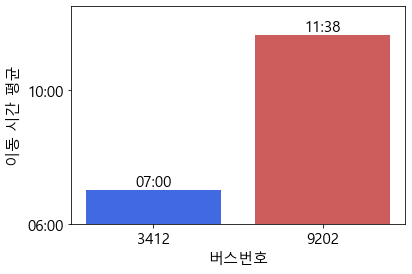

In [20]:
# 버스번호별 이동 시간 평균 계산
mean_by_day_2 = df_2_traffic.groupby('버스번호')['이동 시간'].mean()

# 색상 리스트
colors = ['royalblue', 'indianred', 'limegreen', 'darkorange', 'violet', 'lightgray']

# 시각화
plt.bar(mean_by_day_2.index, mean_by_day_2, color=colors)
plt.xlabel('버스번호')
plt.ylabel('이동 시간 평균')

ylim_int = []

# 막대 위에 값 텍스트 추가
for i, v in enumerate(mean_by_day_2.values):
    y = int(v)
    ylim_int.append(y)
    minutes = (y % 3600) // 60
    seconds = y % 60
    time_formatted = f"{minutes:02d}:{seconds:02d}"
    plt.text(i, y, time_formatted, ha='center', va='bottom')

# ylim 시분초로 수정
delta = 60 * 1
ylim_min = int(min(ylim_int) / 10) * 10 - delta
ylim_max = int(max(ylim_int) / 10) * 10 + delta
plt.ylim(ylim_min, ylim_max)
time_int = range(ylim_min, ylim_max, 240)
ylim_data = []
for i in time_int:
    minutes = (i % 3600) // 60
    seconds = i % 60
    time_formatted = f"{minutes:02d}:{seconds:02d}"
    ylim_data.append(time_formatted)
plt.yticks(time_int, ylim_data)

# 그래프 보이기
plt.show()

### 9202번 버스 

In [21]:
filtered_df = df_2_traffic[df_2_traffic['버스번호'] == '9202']

# 필요한 열만 선택하여 가져옵니다.
desired_columns = ['요일', '탑승 시간', '하차 시간', '이동 시간']
df_9202_traffic = filtered_df[desired_columns]

df_9202_traffic.head()

,요일,탑승 시간,하차 시간,이동 시간
2,목,2023-06-07 08:04:14,2023-06-07 08:17:42,808.0
6,화,2023-06-07 07:52:41,2023-06-07 08:05:21,760.0
10,목,2023-06-07 07:50:14,2023-06-07 08:01:43,689.0
16,월,2023-06-07 07:53:03,2023-06-07 08:02:43,580.0
20,목,2023-06-07 07:50:52,2023-06-07 08:01:48,656.0


##### 7시 8시 30분까지의 10분 간격 리스트

In [22]:
from datetime import datetime

now = datetime.now()
year = now.year
month = now.month
day = now.day

start_time_list = []
end_time_list = []

for i in range(7, 9):
    for j in range(0, 6):
        if i == 8 and j == 4:
            break
        # start_day = f'{year}-{month:02d}-{day:02d} {i:02d}:{j}0:00'
        start_day = f'{i:02d}:{j}0:00'
        start_time_list.append(start_day)

        end_day = f'{i:02d}:{j}9:00'
        end_time_list.append(end_day)

C:\Users\korea\AppData\Local\Temp\ipykernel_16764\2897434375.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_traffic_morning['탑승 시간'] = pd.to_datetime(df_2_traffic_morning['탑승 시간'], format='%H:%M')
C:\Users\korea\AppData\Local\Temp\ipykernel_16764\2897434375.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_traffic_morning['탑승 시간'] = pd.to_datetime(df_2_traffic_morning['탑승 시간'], format='%H:%M')
C:\Users\korea\AppData\Local\Temp\ipykernel_16764\2897434375.py:13: SettingWithCopyWarning: 
A v

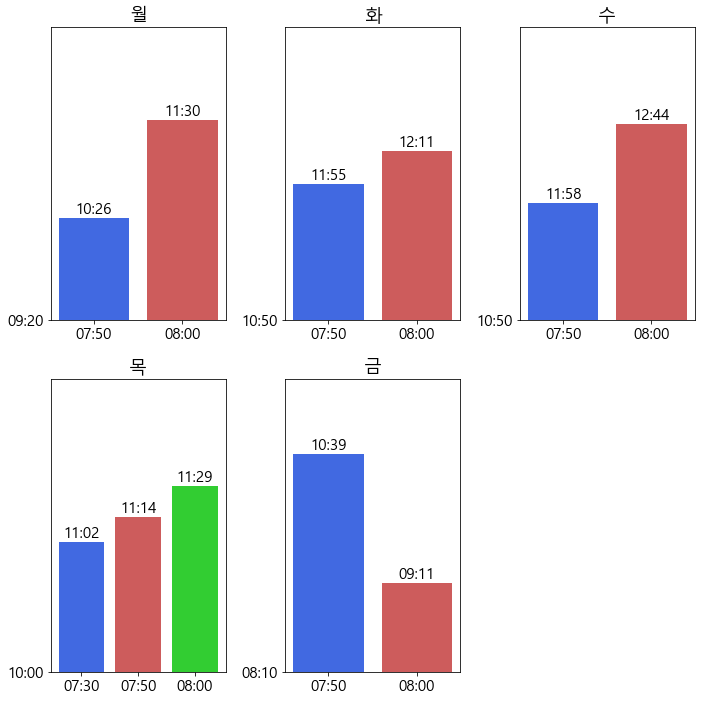

In [23]:
# 서브플롯 생성
a, b, a_max, b_max = 0, 0, 2, 3
fig, axes = plt.subplots(nrows=a_max, ncols=b_max, figsize=(10, 10))
weekday_days = ['월', '화', '수', '목', '금']

# 색상 리스트
colors = ['royalblue', 'indianred', 'limegreen', 'darkorange', 'violet', 'lightgray']

for day in weekday_days:
    df_2_traffic_morning = df_9202_traffic[df_9202_traffic['요일'] == day]
    
    # 날짜 및 시간 형식으로 데이터 변환
    df_2_traffic_morning['탑승 시간'] = pd.to_datetime(df_2_traffic_morning['탑승 시간'], format='%H:%M')
    time_list = []
    for day_start, day_end in zip(start_time_list, end_time_list):
        df_mean = None
        filtered_df = df_2_traffic_morning.loc[(df_2_traffic_morning['탑승 시간'] >= day_start) & (df_2_traffic_morning['탑승 시간'] <= day_end)]
        df_mean = filtered_df['이동 시간'].mean()

        if np.isnan(df_mean):
            time_list.append(np.nan)
        else:
            time_list.append(int(df_mean)) 

    # nan 값을 제외한 유효한 인덱스를 가져옵니다.
    valid_indices = [i for i, val in enumerate(time_list) if not np.isnan(val)]

    # 유효한 인덱스에 해당하는 X와 y 값을 가져옵니다.
    valid_X = [start_time_list[i] for i in valid_indices]
    valid_y = [time_list[i] for i in valid_indices]

    X_updated = [time[:5] for time in valid_X]
    axes[a, b].bar(X_updated, valid_y, color=colors)
    axes[a, b].set_title(day)
    ylim_int = []

    # 막대 위에 값 텍스트 추가
    for i, v in enumerate(valid_y):
        y = int(v)
        ylim_int.append(y)
        minutes = (y % 3600) // 60
        seconds = y % 60
        time_formatted = f"{minutes:02d}:{seconds:02d}"
        axes[a, b].text(i, y, time_formatted, ha='center', va='bottom')

    # ylim 분초로 수정
    delta = 60 * 1
    ylim_min = int(min(ylim_int) / 10) * 10 - delta
    ylim_max = int(max(ylim_int) / 10) * 10 + delta
    axes[a, b].set_ylim(ylim_min, ylim_max)
    time_int = range(ylim_min, ylim_max, 240)
    ylim_data = []
    for i in time_int:
        minutes = i // 60
        seconds = i % 60
        time_formatted = f"{minutes:02d}:{seconds:02d}"
        ylim_data.append(time_formatted)
    axes[a, b].set_yticks(time_int, ylim_data)

    if b < b_max - 1:
        b += 1
    elif b == b_max -1:
        a += 1
        b = 0

axes[1, 2].axis('off')

plt.tight_layout()

plt.show()

### 3412번 버스 

In [24]:
filtered_df = df_2_traffic[df_2_traffic['버스번호'] == '3412']

# 필요한 열만 선택하여 가져옵니다.
desired_columns = ['요일', '탑승 시간', '하차 시간', '이동 시간']
df_3412_traffic = filtered_df[desired_columns]

df_3412_traffic

,요일,탑승 시간,하차 시간,이동 시간
0,금,2023-06-07 07:50:26,2023-06-07 07:56:10,344.0
4,수,2023-06-07 07:56:26,2023-06-07 08:03:11,405.0
8,금,2023-06-07 07:34:50,2023-06-07 07:42:11,441.0
12,수,2023-06-07 07:29:15,2023-06-07 07:36:25,430.0
14,화,2023-06-07 07:42:17,2023-06-07 07:50:37,500.0
18,금,2023-06-07 07:58:35,2023-06-07 08:05:17,402.0


##### 7시 8시 30분까지의 10분 간격 리스트

In [25]:
from datetime import datetime

now = datetime.now()
year = now.year
month = now.month
day = now.day

start_time_list = []
end_time_list = []

for i in range(7, 9):
    for j in range(0, 6):
        if i == 8 and j == 4:
            break
        # start_day = f'{year}-{month:02d}-{day:02d} {i:02d}:{j}0:00'
        start_day = f'{i:02d}:{j}0:00'
        start_time_list.append(start_day)

        end_day = f'{i:02d}:{j}9:59'
        end_time_list.append(end_day)

C:\Users\korea\AppData\Local\Temp\ipykernel_16764\2160654512.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_traffic_morning['탑승 시간'] = pd.to_datetime(df_2_traffic_morning['탑승 시간'], format='%H:%M')
C:\Users\korea\AppData\Local\Temp\ipykernel_16764\2160654512.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_traffic_morning['탑승 시간'] = pd.to_datetime(df_2_traffic_morning['탑승 시간'], format='%H:%M')
C:\Users\korea\AppData\Local\Temp\ipykernel_16764\2160654512.py:15: SettingWithCopyWarning: 
A v

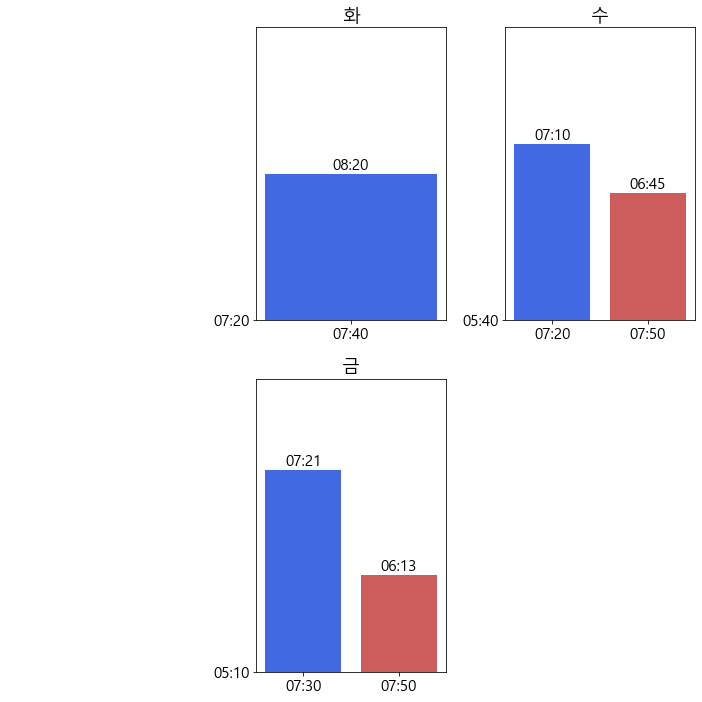

In [26]:
# 서브플롯 생성
a, b, a_max, b_max = 0, 0, 2, 3
fig, axes = plt.subplots(nrows=a_max, ncols=b_max, figsize=(10, 10))
weekday_days = ['월', '화', '수', '목', '금']

# 색상 리스트
colors = ['royalblue', 'indianred', 'limegreen', 'darkorange', 'violet', 'lightgray']

for day in weekday_days:
    if any(day in d for d in df_3412_traffic['요일']):
        df_2_traffic_morning = None
        df_2_traffic_morning = df_3412_traffic[df_3412_traffic['요일'] == day]

        # 날짜 및 시간 형식으로 데이터 변환
        df_2_traffic_morning['탑승 시간'] = pd.to_datetime(df_2_traffic_morning['탑승 시간'], format='%H:%M')
        time_list = []
        for day_start, day_end in zip(start_time_list, end_time_list):
            df_mean = None
            filtered_df = df_2_traffic_morning.loc[(df_2_traffic_morning['탑승 시간'] >= day_start) & (df_2_traffic_morning['탑승 시간'] <= day_end)]
            df_mean = filtered_df['이동 시간'].mean()

            if np.isnan(df_mean):
                time_list.append(np.nan)
            else:
                time_list.append(int(df_mean)) 

        # nan 값을 제외한 유효한 인덱스를 가져옵니다.
        valid_indices = [i for i, val in enumerate(time_list) if not np.isnan(val)]

        # 유효한 인덱스에 해당하는 X와 y 값을 가져옵니다.
        valid_X = [start_time_list[i] for i in valid_indices]
        valid_y = [time_list[i] for i in valid_indices]

        X_updated = [time[:5] for time in valid_X]
        axes[a, b].bar(X_updated, valid_y, color=colors)
        axes[a, b].set_title(day)
        ylim_int = []

        # 막대 위에 값 텍스트 추가
        for i, v in enumerate(valid_y):
            y = int(v)
            ylim_int.append(y)
            minutes = (y % 3600) // 60
            seconds = y % 60
            time_formatted = f"{minutes:02d}:{seconds:02d}"
            axes[a, b].text(i, y, time_formatted, ha='center', va='bottom')

        # ylim 분초로 수정
        delta = 60 * 1
        ylim_min = int(min(ylim_int) / 10) * 10 - delta
        ylim_max = int(max(ylim_int) / 10) * 10 + delta
        axes[a, b].set_ylim(ylim_min, ylim_max)
        time_int = range(ylim_min, ylim_max, 240)
        ylim_data = []
        for i in time_int:
            minutes = i // 60
            seconds = i % 60
            time_formatted = f"{minutes:02d}:{seconds:02d}"
            ylim_data.append(time_formatted)
        axes[a, b].set_yticks(time_int, ylim_data)

        if b < b_max - 1:
            b += 1
        elif b == b_max -1:
            a += 1
            b = 0
    else:
        axes[a, b].axis('off')
        if b < b_max - 1:
            b += 1
        elif b == b_max -1:
            a += 1
            b = 0

axes[1, 2].axis('off')

plt.tight_layout()

plt.show()

## 2) df의 1차 교통 비교

In [27]:
filtered_df = df[df['교통수단'] == '1차 교통']

# 필요한 열만 선택하여 가져옵니다.
desired_columns = ['요일', '탑승 시간', '하차 시간', '버스번호', '이동 시간']
df_1_traffic = filtered_df[desired_columns]
df_1_traffic['이동 시간'] = pd.to_timedelta(df_1_traffic['이동 시간'])
df_1_traffic.loc[:, '버스번호'] = df_1_traffic['버스번호'].astype(float).astype(str)

C:\Users\korea\AppData\Local\Temp\ipykernel_16764\2349262559.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_traffic['이동 시간'] = pd.to_timedelta(df_1_traffic['이동 시간'])


In [28]:
df_1_traffic.loc[:, '이동 시간'] = df_1_traffic['이동 시간'].dt.total_seconds()

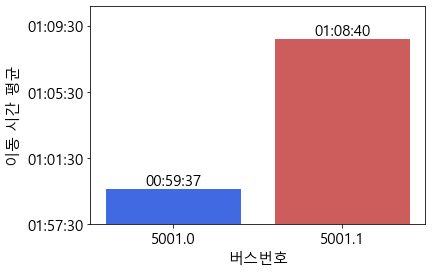

In [29]:
# 버스번호별 이동 시간 평균 계산
mean_by_day_1 = df_1_traffic.groupby('버스번호')['이동 시간'].mean()

# 색상 리스트
colors = ['royalblue', 'indianred', 'limegreen', 'darkorange', 'violet', 'lightgray']

# 시각화
plt.bar(mean_by_day_1.index, mean_by_day_1, color=colors)
plt.xlabel('버스번호')
plt.ylabel('이동 시간 평균')

ylim_int = []

# 막대 위에 값 텍스트 추가
for i, v in enumerate(mean_by_day_1.values):
    y = int(v)
    ylim_int.append(y)
    hours = y // 3600
    minutes = (y % 3600) // 60
    seconds = y % 60
    time_formatted = f"{hours:02d}:{minutes:02d}:{seconds:02d}"
    plt.text(i, y, time_formatted, ha='center', va='bottom')

# ylim 시분초로 수정
delta = 60 * 2
ylim_min = int(min(ylim_int) / 10) * 10 - delta
ylim_max = int(max(ylim_int) / 10) * 10 + delta
plt.ylim(ylim_min, ylim_max)
time_int = range(ylim_min, ylim_max, 240)
ylim_data = []
for i in time_int:
    minutes = (i % 3600) // 60
    seconds = i % 60
    time_formatted = f"{hours:02d}:{minutes:02d}:{seconds:02d}"
    ylim_data.append(time_formatted)
plt.yticks(time_int, ylim_data)

# 그래프 보이기
plt.show()

### 5001번 버스 

In [30]:
filtered_df = df_1_traffic[df_1_traffic['버스번호'] == '5001.0']

# 필요한 열만 선택하여 가져옵니다.
desired_columns = ['요일', '탑승 시간', '하차 시간', '이동 시간']
df_5001_traffic = filtered_df[desired_columns]

df_5001_traffic

,요일,탑승 시간,하차 시간,이동 시간
1,금,2023-06-07 06:43:19,2023-06-07 07:40:21,3422.0
5,수,2023-06-07 06:51:06,2023-06-07 07:53:30,3744.0
9,금,2023-06-07 06:33:37,2023-06-07 07:29:30,3353.0
13,수,2023-06-07 06:24:53,2023-06-07 07:24:33,3580.0
15,화,2023-06-07 06:39:11,2023-06-07 07:38:00,3529.0
19,금,2023-06-07 06:36:47,2023-06-07 07:39:55,3788.0
21,목,2023-06-07 06:39:11,2023-06-07 07:41:25,3734.0
23,수,2023-06-07 06:39:02,2023-06-07 07:40:11,3669.0
25,화,2023-06-07 06:27:06,2023-06-07 07:26:33,3567.0
31,목,2023-06-07 06:42:56,2023-06-07 07:40:22,3446.0


##### 6시간대 10분 간격 리스트

In [31]:
from datetime import datetime

now = datetime.now()
year = now.year
month = now.month
day = now.day

start_time_list = []
end_time_list = []

for j in range(0, 6):
    start_day = f'06:{j}0:00'
    start_time_list.append(start_day)

    end_day = f'06:{j}9:59'
    end_time_list.append(end_day)

C:\Users\korea\AppData\Local\Temp\ipykernel_16764\3200982272.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_traffic_morning['탑승 시간'] = pd.to_datetime(df_1_traffic_morning['탑승 시간'], format='%H:%M:%S')
C:\Users\korea\AppData\Local\Temp\ipykernel_16764\3200982272.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_traffic_morning['탑승 시간'] = pd.to_datetime(df_1_traffic_morning['탑승 시간'], format='%H:%M:%S')
C:\Users\korea\AppData\Local\Temp\ipykernel_16764\3200982272.py:15: SettingWithCopyWarning

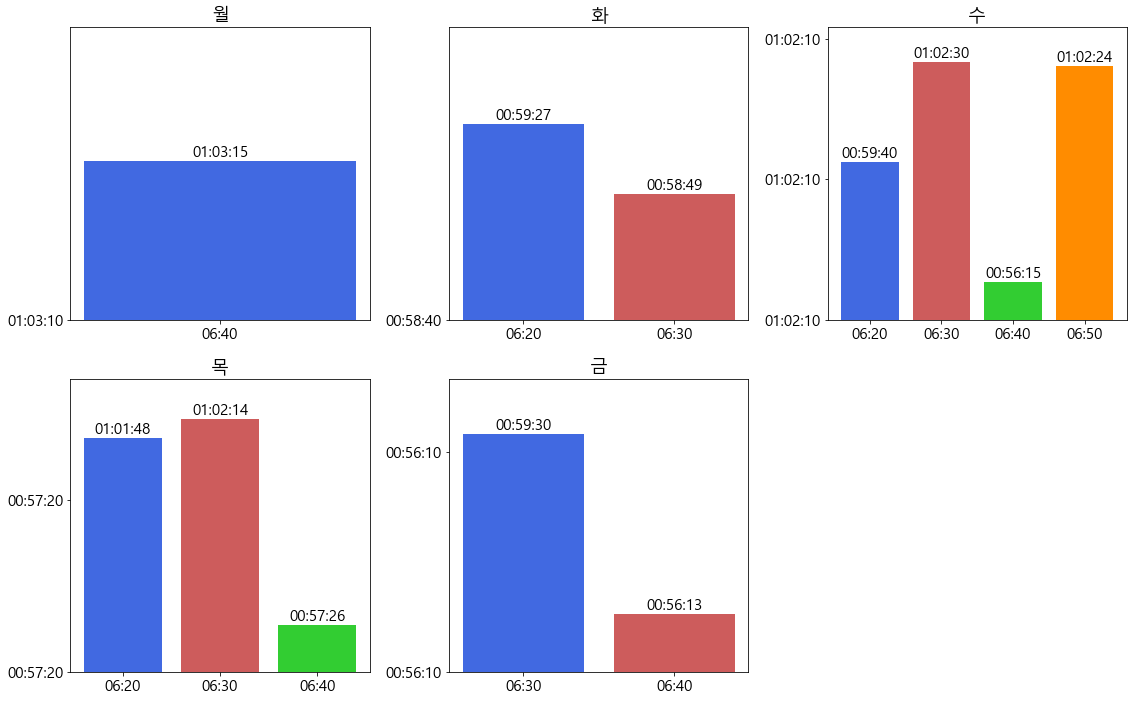

In [32]:
# 서브플롯 생성
a, b, a_max, b_max = 0, 0, 2, 3
fig, axes = plt.subplots(nrows=a_max, ncols=b_max, figsize=(16, 10))
weekday_days = ['월', '화', '수', '목', '금']

# 색상 리스트
colors = ['royalblue', 'indianred', 'limegreen', 'darkorange', 'violet', 'lightgray']

for day in weekday_days:
    if any(day in d for d in df_5001_traffic['요일']):
        df_1_traffic_morning = None
        df_1_traffic_morning = df_5001_traffic[df_5001_traffic['요일'] == day]

        # 날짜 및 시간 형식으로 데이터 변환
        df_1_traffic_morning['탑승 시간'] = pd.to_datetime(df_1_traffic_morning['탑승 시간'], format='%H:%M:%S')
        time_list = []
        for day_start, day_end in zip(start_time_list, end_time_list):
            df_mean = None
            filtered_df = df_1_traffic_morning.loc[(df_1_traffic_morning['탑승 시간'] >= day_start) & (df_1_traffic_morning['탑승 시간'] <= day_end)]
            df_mean = filtered_df['이동 시간'].mean()

            if np.isnan(df_mean):
                time_list.append(np.nan)
            else:
                time_list.append(int(df_mean)) 

        # nan 값을 제외한 유효한 인덱스를 가져옵니다.
        valid_indices = [i for i, val in enumerate(time_list) if not np.isnan(val)]

        # 유효한 인덱스에 해당하는 X와 y 값을 가져옵니다.
        valid_X = [start_time_list[i] for i in valid_indices]
        valid_y = [time_list[i] for i in valid_indices]

        X_updated = [time[:5] for time in valid_X]
        axes[a, b].bar(X_updated, valid_y, color=colors)
        axes[a, b].set_title(day)
        ylim_int = []
        # 막대 위에 값 텍스트 추가
        for i, v in enumerate(valid_y):
            y = int(v)
            ylim_int.append(y)
            hours = y // 3600
            minutes = (y % 3600) // 60
            seconds = y % 60
            time_formatted = f"{hours:02d}:{minutes:02d}:{seconds:02d}"
            axes[a, b].text(i, y, time_formatted, ha='center', va='bottom')

        # ylim 시분초로 수정
        delta = 60 * 1
        ylim_min = int(min(ylim_int) / 10) * 10 - delta
        ylim_max = int(max(ylim_int) / 10) * 10 + delta
        axes[a, b].set_ylim(ylim_min, ylim_max)
        time_int = range(ylim_min, ylim_max, 240)
        ylim_data = []
        for i in time_int:
            hours = y // 3600
            minutes = (y % 3600) // 60
            seconds = i % 60
            time_formatted = f"{hours:02d}:{minutes:02d}:{seconds:02d}"
            ylim_data.append(time_formatted)
        axes[a, b].set_yticks(time_int, ylim_data)

        if b < b_max - 1:
            b += 1
        elif b == b_max -1:
            a += 1
            b = 0
    else:
        axes[a, b].axis('off')
        if b < b_max - 1:
            b += 1
        elif b == b_max -1:
            a += 1
            b = 0

axes[1, 2].axis('off')

plt.tight_layout()

plt.show()

### 5001-1번 버스 

In [33]:
filtered_df = df_1_traffic[df_1_traffic['버스번호'] == '5001.1']

# 필요한 열만 선택하여 가져옵니다.
desired_columns = ['요일', '탑승 시간', '하차 시간', '이동 시간']
df_5001_1_traffic = filtered_df[desired_columns]

df_5001_1_traffic.head()

,요일,탑승 시간,하차 시간,이동 시간
3,목,2023-06-07 06:51:20,2023-06-07 07:59:02,4062.0
7,화,2023-06-07 06:36:58,2023-06-07 07:45:09,4091.0
11,목,2023-06-07 06:39:27,2023-06-07 07:48:34,4147.0
17,월,2023-06-07 06:33:31,2023-06-07 07:43:06,4175.0
27,월,2023-06-07 06:36:33,2023-06-07 07:45:40,4147.0


C:\Users\korea\AppData\Local\Temp\ipykernel_16764\644573983.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_traffic_morning['탑승 시간'] = pd.to_datetime(df_1_traffic_morning['탑승 시간'], format='%H:%M:%S')
C:\Users\korea\AppData\Local\Temp\ipykernel_16764\644573983.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_traffic_morning['탑승 시간'] = pd.to_datetime(df_1_traffic_morning['탑승 시간'], format='%H:%M:%S')
C:\Users\korea\AppData\Local\Temp\ipykernel_16764\644573983.py:15: SettingWithCopyWarning: 


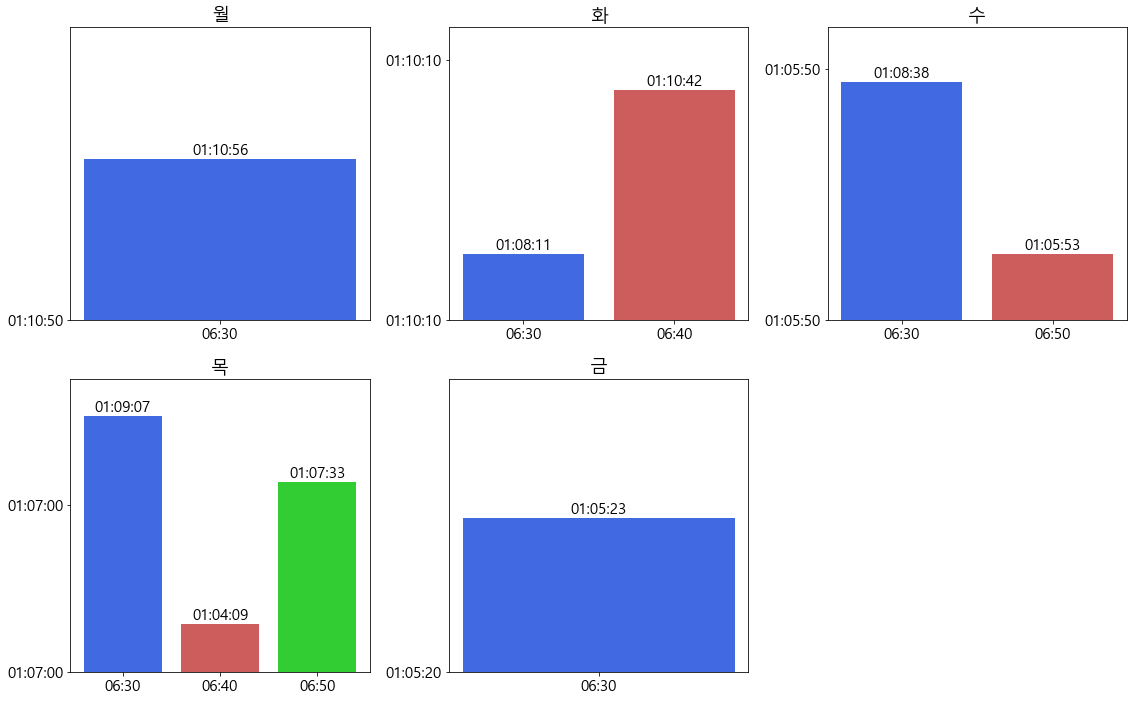

In [34]:
# 서브플롯 생성
a, b, a_max, b_max = 0, 0, 2, 3
fig, axes = plt.subplots(nrows=a_max, ncols=b_max, figsize=(16, 10))
weekday_days = ['월', '화', '수', '목', '금']

# 색상 리스트
colors = ['royalblue', 'indianred', 'limegreen', 'darkorange', 'violet', 'lightgray']

for day in weekday_days:
    if any(day in d for d in df_5001_1_traffic['요일']):
        df_1_traffic_morning = None
        df_1_traffic_morning = df_5001_1_traffic[df_5001_1_traffic['요일'] == day]

        # 날짜 및 시간 형식으로 데이터 변환
        df_1_traffic_morning['탑승 시간'] = pd.to_datetime(df_1_traffic_morning['탑승 시간'], format='%H:%M:%S')
        time_list = []
        for day_start, day_end in zip(start_time_list, end_time_list):
            df_mean = None
            filtered_df = df_1_traffic_morning.loc[(df_1_traffic_morning['탑승 시간'] >= day_start) & (df_1_traffic_morning['탑승 시간'] <= day_end)]
            df_mean = filtered_df['이동 시간'].mean()

            if np.isnan(df_mean):
                time_list.append(np.nan)
            else:
                time_list.append(int(df_mean)) 

        # nan 값을 제외한 유효한 인덱스를 가져옵니다.
        valid_indices = [i for i, val in enumerate(time_list) if not np.isnan(val)]

        # 유효한 인덱스에 해당하는 X와 y 값을 가져옵니다.
        valid_X = [start_time_list[i] for i in valid_indices]
        valid_y = [time_list[i] for i in valid_indices]

        X_updated = [time[:5] for time in valid_X]
        axes[a, b].bar(X_updated, valid_y, color=colors)
        axes[a, b].set_title(day)
        ylim_int = []
        # 막대 위에 값 텍스트 추가
        for i, v in enumerate(valid_y):
            y = int(v)
            ylim_int.append(y)
            hours = y // 3600
            minutes = (y % 3600) // 60
            seconds = y % 60
            time_formatted = f"{hours:02d}:{minutes:02d}:{seconds:02d}"
            axes[a, b].text(i, y, time_formatted, ha='center', va='bottom')

        # ylim 시분초로 수정
        delta = 60 * 1
        ylim_min = int(min(ylim_int) / 10) * 10 - delta
        ylim_max = int(max(ylim_int) / 10) * 10 + delta
        axes[a, b].set_ylim(ylim_min, ylim_max)
        time_int = range(ylim_min, ylim_max, 240)
        ylim_data = []
        for i in time_int:
            hours = y // 3600
            minutes = (y % 3600) // 60
            seconds = i % 60
            time_formatted = f"{hours:02d}:{minutes:02d}:{seconds:02d}"
            ylim_data.append(time_formatted)
        axes[a, b].set_yticks(time_int, ylim_data)

        if b < b_max - 1:
            b += 1
        elif b == b_max -1:
            a += 1
            b = 0
    else:
        axes[a, b].axis('off')
        if b < b_max - 1:
            b += 1
        elif b == b_max -1:
            a += 1
            b = 0

axes[1, 2].axis('off')

plt.tight_layout()

plt.show()